In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import power_transform, StandardScaler
import numpy as np

def load_data(filepath):
    try:
        df = pd.read_csv(filepath)
        print(f'Dataframe shape: {df.shape}')
        print(f'Dataframe columns: {df.columns.tolist()}')
        df.info()
        return df

    except Exception as e:
        print(f'Error Loading data: {e}')
    return None

def distribution_plot(feature):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True, stat="density", linewidth=0)

    # Calculate mean and standard deviation
    mean_value = df[feature].mean()
    std_deviation = df[feature].std()

    # Plot vertical lines for mean and std deviation
    plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
    plt.axvline(mean_value + std_deviation, color='g', linestyle=':', label=f'Std Dev: {std_deviation:.2f}')
    plt.axvline(mean_value - std_deviation, color='g', linestyle=':')

    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()
    return plt



In [2]:
import joblib
df = joblib.load('df_chosen_features.csv')

In [3]:
df.columns


Index(['tcp.srcport', 'tcp.dstport', 'tcp.len', 'tcp.window_size',
       'tcp.flags.syn'],
      dtype='object')

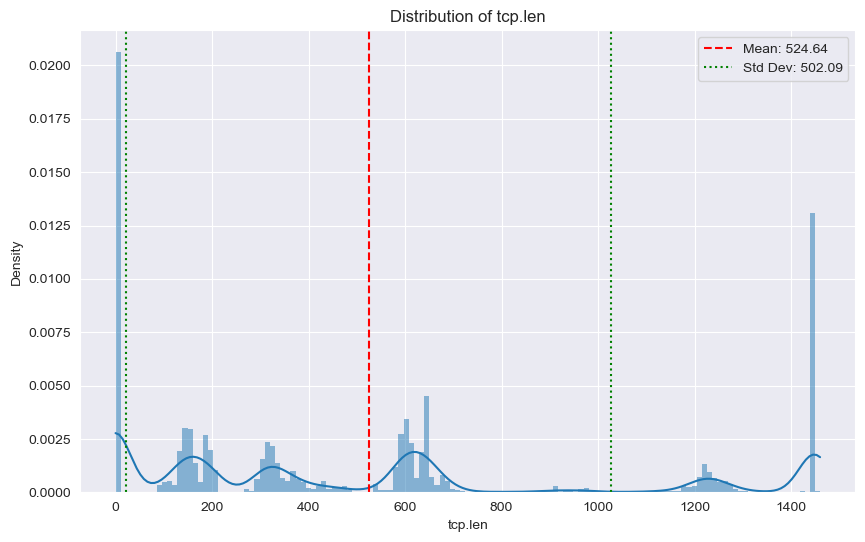

<module 'matplotlib.pyplot' from '/media/sumanas/Storage/envs/lowl-jaja-test/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [14]:
# feature = 'tcp.srcport'
# feature = 'tcp.dstport'
feature = 'tcp.len'
# feature = 'tcp.window_size'
# feature = 'tcp.flags.syn'


distribution_plot(feature)

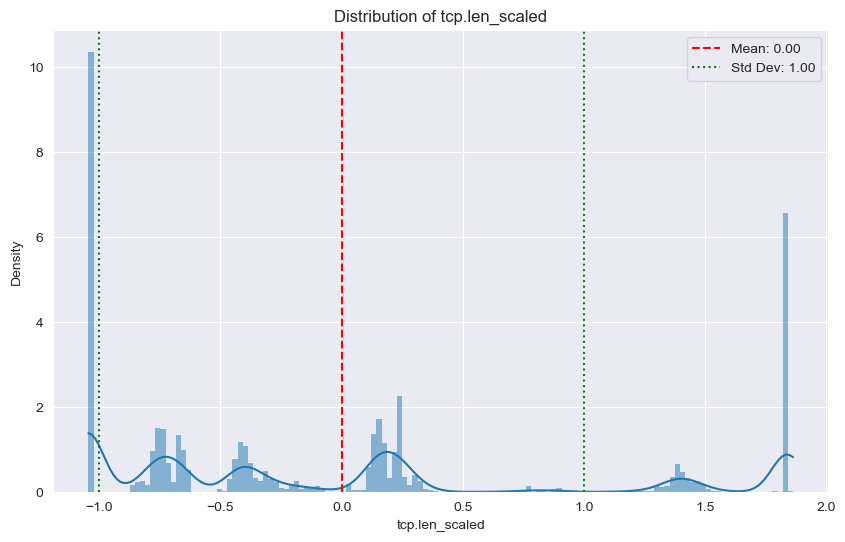

<module 'matplotlib.pyplot' from '/media/sumanas/Storage/envs/lowl-jaja-test/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [15]:
# I'll try to see what happens if I scale the df (z_score):
scaler = StandardScaler()
scaled_feature = scaler.fit_transform(df[feature].values.reshape(-1,1))
# scaled_feature = scaler.fit_transform(df[[feature]].values.reshape(-1,1))
df[f'{feature}_scaled'] = scaled_feature.flatten()
distribution_plot(f'{feature}_scaled')

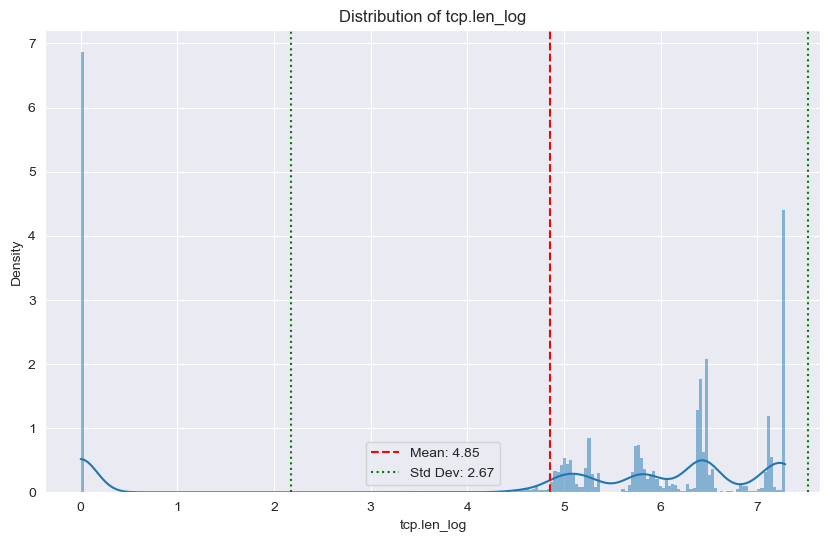

<module 'matplotlib.pyplot' from '/media/sumanas/Storage/envs/lowl-jaja-test/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [16]:
# I'll try to see what happens if I use the log of the df feature :
feature_log = np.log(df[[feature]] + 1 - df[[feature]].min())
df[f'{feature}_log'] = feature_log
distribution_plot(f'{feature}_log')

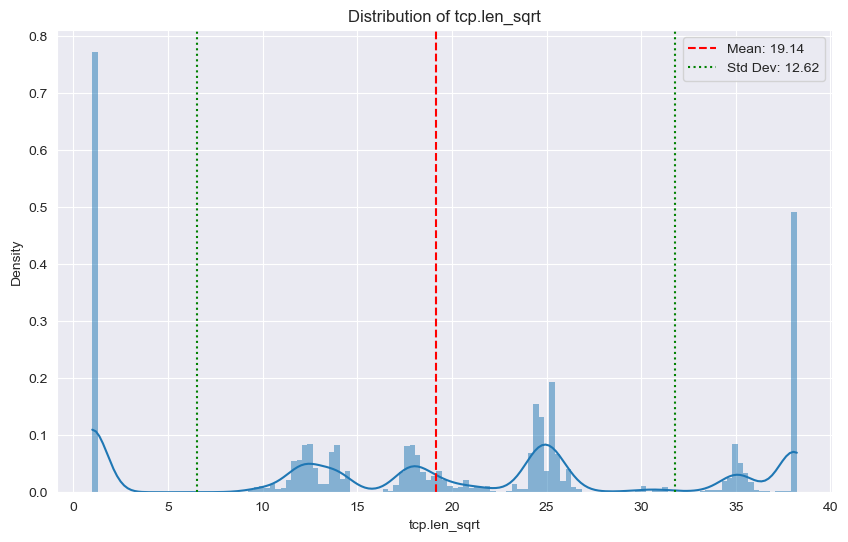

<module 'matplotlib.pyplot' from '/media/sumanas/Storage/envs/lowl-jaja-test/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [17]:
# I'll try to see what happens if I use the square root of the df feature :
df_sqrt = np.sqrt(df[[feature]] - df[[feature]].min() + 1)
df[f'{feature}_sqrt'] = df_sqrt
distribution_plot(f'{feature}_sqrt')

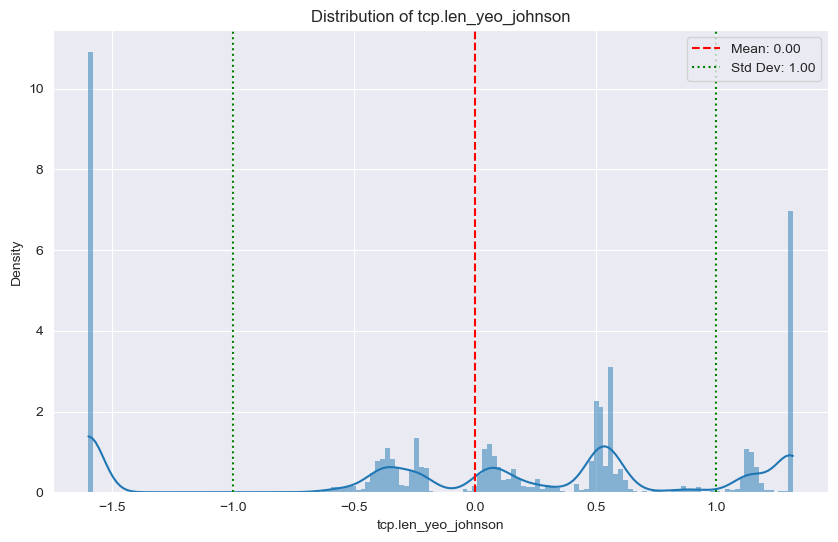

<module 'matplotlib.pyplot' from '/media/sumanas/Storage/envs/lowl-jaja-test/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [18]:
# I'll try to see what happens if I use the yeo johnson method on the feature :
yeo_johnson_transformed = power_transform(df[[feature]], method='yeo-johnson')
df[f'{feature}_yeo_johnson'] = yeo_johnson_transformed
distribution_plot(f'{feature}_yeo_johnson')


 it seems that the distribution of tcp.len is multimodal with several peaks, and it's not symmetrical or bell-shaped like a Gaussian distribution.

I see 4 peaks in the distribution. I would like to see what traffic they represent
Investigating the modes to understand the different types of traffic they represent.


In [20]:
filepath = "attack-sample.csv"
df_original = load_data(filepath)

/tmp/ipykernel_379247/624519760.py:9: DtypeWarning: Columns (34,37,44,50,52,54,70,71) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Dataframe shape: (1000000, 74)
Dataframe columns: ['frame.number', 'frame.len', 'frame.time', 'frame.time_epoch', 'frame.protocols', 'eth.src', 'eth.dst', 'eth.type', 'ip.src', 'ip.dst', 'ip.len', 'ip.ttl', 'ip.flags', 'ip.frag_offset', 'ip.proto', 'ip.version', 'ip.dsfield', 'ip.checksum', 'tcp.srcport', 'tcp.dstport', 'tcp.len', 'tcp.seq', 'tcp.ack', 'tcp.flags', 'tcp.flags.syn', 'tcp.flags.ack', 'tcp.flags.fin', 'tcp.flags.reset', 'tcp.window_size', 'tcp.checksum', 'tcp.stream', 'udp.srcport', 'udp.dstport', 'udp.length', 'udp.checksum', 'icmp.type', 'icmp.code', 'icmp.checksum', 'http.request.method', 'http.request.uri', 'http.request.version', 'http.request.full_uri', 'http.response.code', 'http.user_agent', 'http.content_length_header', 'http.content_type', 'http.cookie', 'http.host', 'http.referer', 'http.location', 'http.authorization', 'http.connection', 'dns.qry.name', 'dns.qry.type', 'dns.qry.class', 'dns.flags.response', 'dns.flags.recdesired', 'dns.flags.rcode', 'dns.resp.

In [48]:
peak_traffic_1 = df_original.loc[(df_original['tcp.len'] >100) & (df_original['tcp.len'] < 250), 'frame.protocols'].str.split(':', expand=True).stack().value_counts()
print(f'** First Peak Packet Protocols: \n{peak_traffic_1}' )

** First Peak Packet Protocols: 
eth                176695
ethertype          176695
ip                 176695
tcp                176695
http               176657
data-text-lines     18545
xml                  8085
urlencoded-form       217
png                    54
media                  11
image-gif               3
data                    2
image-jfif              2
tls                     2
nbss                    1
smb                     1
ssh                     1
Name: count, dtype: int64


In [38]:
peak_traffic_2 = df_original.loc[(df_original['tcp.len'] >250) & (df_original['tcp.len'] < 400), 'frame.protocols'].str.split(':', expand=True).stack().value_counts()
print(f'** Second Peak Packet Protocols: \n{peak_traffic_2}' )

** Second Peak Packet Protocols: 
eth                125496
ethertype          125496
ip                 125496
tcp                125496
http               125007
data-text-lines      2190
xml                  1894
urlencoded-form       183
data                   38
media                   9
png                     7
image-gif               3
tls                     2
Name: count, dtype: int64


In [39]:
peak_traffic_3 = df_original.loc[(df_original['tcp.len'] >570) & (df_original['tcp.len'] < 700), 'frame.protocols'].str.split(':', expand=True).stack().value_counts()
print(f'** Third Peak Packet Protocols: \n{peak_traffic_3}' )

** Third Peak Packet Protocols: 
eth                205642
ethertype          205642
ip                 205642
tcp                205642
http               205619
data-text-lines    204296
xml                  9477
image-gif             158
png                    64
media                  61
urlencoded-form         6
data                    3
image-jfif              2
mime_multipart          1
Name: count, dtype: int64


In [40]:
peak_traffic_4 = df_original.loc[(df_original['tcp.len'] >1100) & (df_original['tcp.len'] < 1300), 'frame.protocols'].str.split(':', expand=True).stack().value_counts()
print(f'** Fourth Peak Packet Protocols: \n{peak_traffic_4}' )

** Fourth Peak Packet Protocols: 
eth                70427
ethertype          70427
ip                 70427
tcp                70427
http               70299
data-text-lines    67003
xml                59832
urlencoded-form     1635
media                 12
png                   10
image-jfif             1
image-gif              1
Name: count, dtype: int64



By examining the counts of the protocols associated with each peak, we can infer several points:

Common Protocols Across All Peaks: Protocols like eth, ethertype, ip, tcp, and http are present in high numbers across all peaks, indicating that they are common across different types of network traffic captured in your dataset.

Data Transfer Protocols: The presence of http and data-text-lines in large numbers suggests that a significant portion of the traffic involves web data transfer and possibly API calls or web services communication.

File Transfer and Media: Protocols such as xml, png, media, image-gif, and image-jfif indicate file transfers, media communication, or web traffic that includes image data. The variance in their numbers across different peaks may point to specific events or time periods when such transfers were more common.

Security and Control Protocols: The occurrence of tls and ssh in smaller numbers suggests encrypted sessions or secure shell communication, which are typically fewer compared to regular web traffic.

Unique Protocols in Peaks: Certain protocols like mime_multipart, nbss, smb, and ssh appear uniquely in some peaks, which might be indicative of specific operations such as email communication, Windows network file sharing, or secure administrative tasks.

Based on these observations, each peak in the TCP length distribution could represent different types of network behavior:

The first peak might be dominated by standard HTTP traffic, possibly indicative of regular web browsing or data transfer.
The second peak shares a similar profile but with slightly less HTTP and more data-text-lines and XML content, suggesting a different kind of data transfer, perhaps involving web services.
The third peak has a substantial increase in data-text-lines, which could suggest a surge in API calls, command and control communication, or other forms of text-based data exchange.
The fourth peak shows a significant increase in XML content. This could be related to SOAP web services traffic, which typically uses XML format, or batch processes that involve XML data.